## Importing Necessory Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')   

## Data Summary

In [4]:
data = pd.read_csv('vertebral_column_data.txt',delimiter=' ',header=None, names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "class"])

In [5]:
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [6]:
# Summary Statistics
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


In [7]:
data.isnull().sum()

pelvic_incidence              0
pelvic_tilt                   0
lumbar_lordosis_angle         0
sacral_slope                  0
pelvic_radius                 0
grade_of_spondylolisthesis    0
class                         0
dtype: int64

In [8]:
# Distribution of Classes
class_distribution = data['class'].value_counts()
class_distribution

class
AB    210
NO    100
Name: count, dtype: int64

# EDA

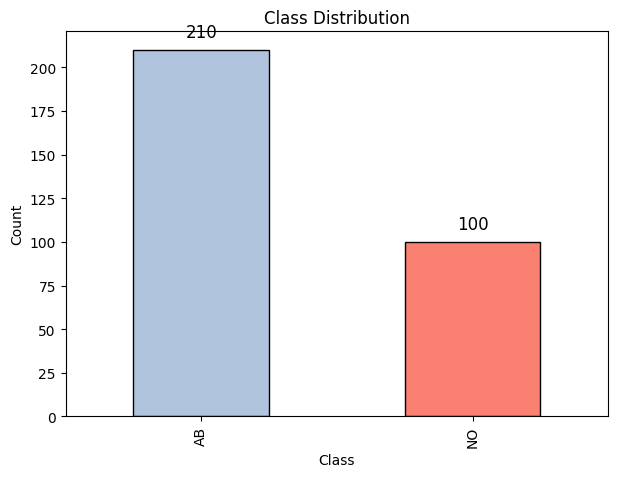

In [27]:
# Set professional color palette
colors = ['lightsteelblue', 'salmon']

# Plot class distribution
plt.figure(figsize=(7, 5))
bars = class_distribution.plot(kind='bar', color=colors, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Add annotations
for i, count in enumerate(class_distribution):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

### Density plot

- Density plots are used to observe the distribution of a variable in a dataset.The peaks of a Density Plot help display where values are concentrated over the interval.
from this we can see that 'pelvic_tilt','pelvic_radius' are perfectly normal distributed.
'pelvic_incidence','lumbar_lordosis_angle','sacral_slope' are some what normally distributed
other columns others are not at all normally distributed.
- degree_spondylolisthesis right skewed or positively skewed. That means major collected datas are greater than 0
'direct_tilt','sacrum_angle','scoliosis_slope'The bimodal distribution looks like the back of a two-humped camel.that means Double-Peaked or Bimodal distribution

- The data are numerical.We can see the shape of the data’s distribution, especially when determining whether the output of a process is distributed approximately normally.
'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope', 'pelvic_radius' are some what normally distributed
degree_spondylolisthesis right skewed
'pelvic_slope','direct_tilt','thoracic_slope', 'cervical_tilt','sacrum_angle','scoliosis_slope' areA randomly distributed

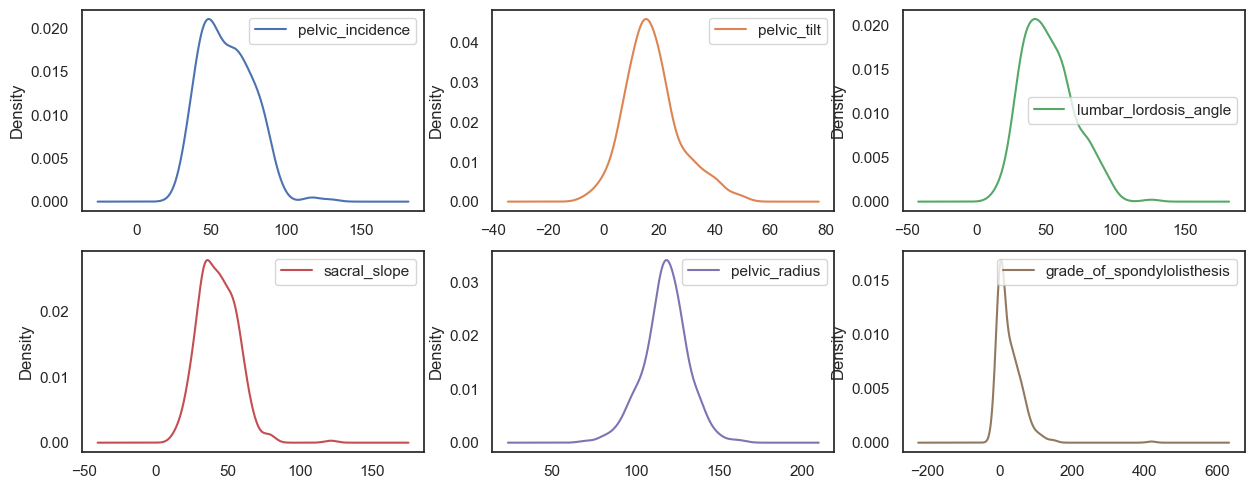

In [66]:
sns.set_theme(style='white')
data.plot(kind='density', subplots=True, layout=(4,3), sharex=False ,figsize=(15,12))
plt.show()

### BoxPlots

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'pelvic_incidence'),
  Text(1, 0, 'pelvic_tilt'),
  Text(2, 0, 'lumbar_lordosis_angle'),
  Text(3, 0, 'sacral_slope'),
  Text(4, 0, 'pelvic_radius'),
  Text(5, 0, 'grade_of_spondylolisthesis')])

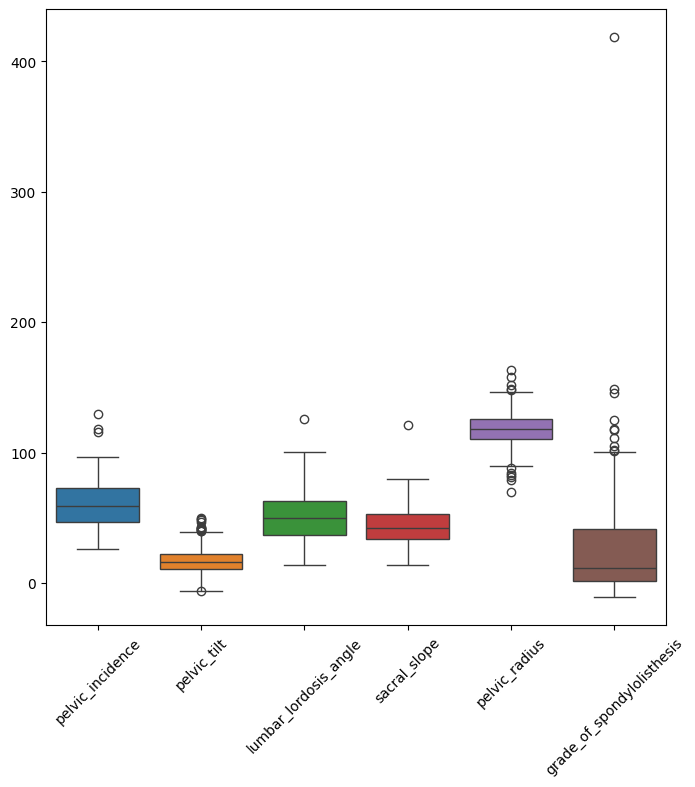

In [28]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data)
plt.xticks(rotation=45)

## Correlation between features

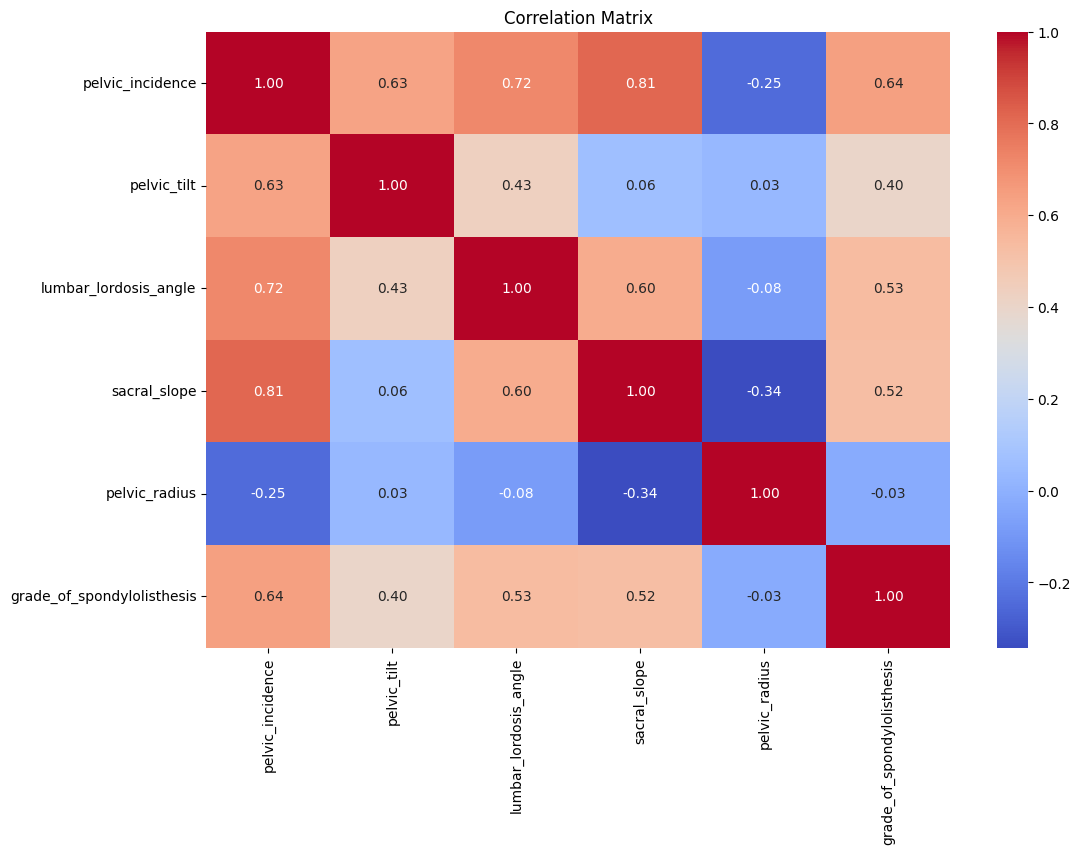

In [29]:
# Drop the target variable 'class' before computing correlations
data_corr = data.drop(columns=['class'])

# Set up the figure size
plt.subplots(figsize=(12, 8))

# Compute the correlation matrix
corr_matrix = data_corr.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title("Correlation Matrix")

# Show plot
plt.show()

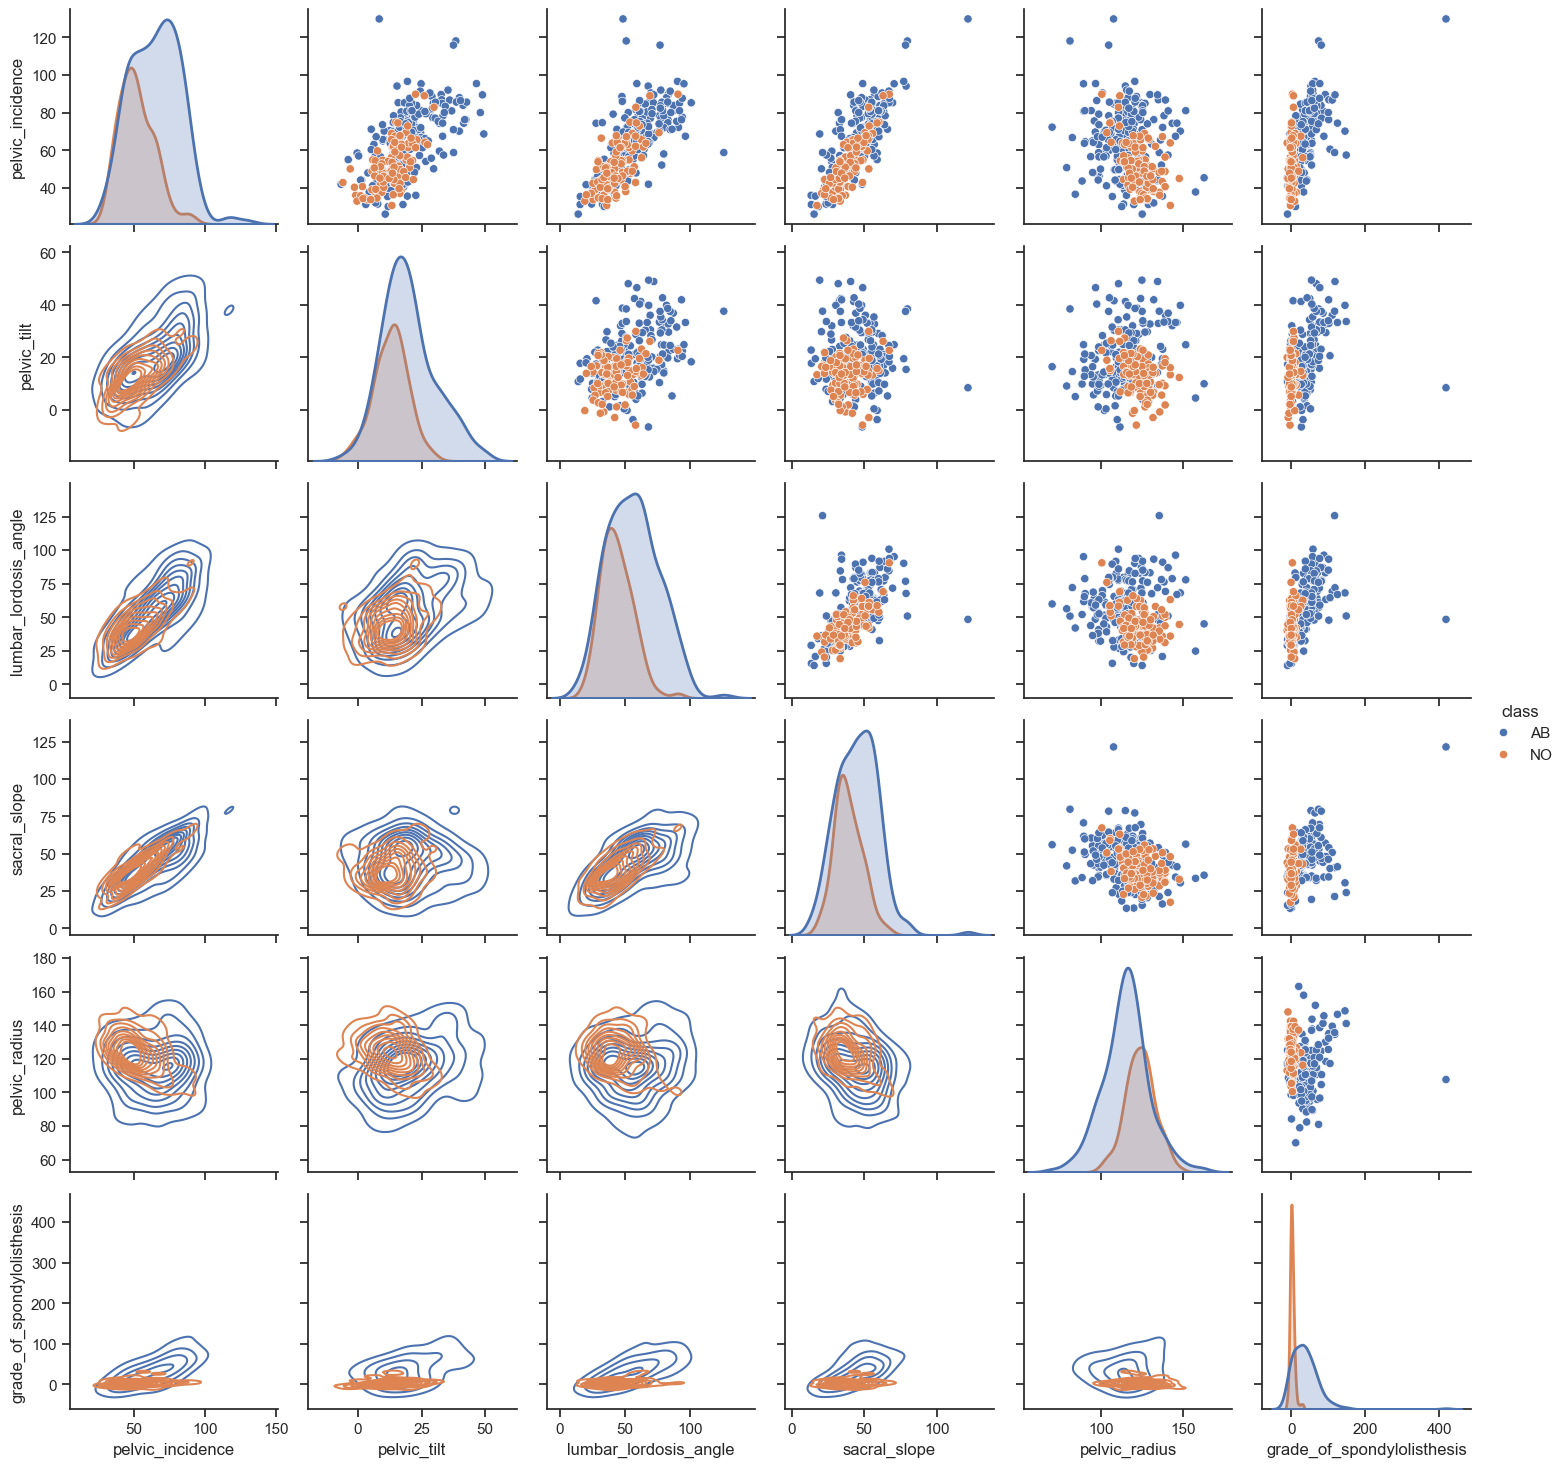

In [74]:
# Create a PairGrid
g = sns.PairGrid(data, hue='class', diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=2, fill=True)

# Add a legend
g.add_legend()

# Show the plot
plt.show()


# Supervised Learning 

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

### Train-validation-test split

In [18]:
# Split features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split data into train-test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Check the shapes of the splits
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (248, 6) (248,)
Test set: (62, 6) (62,)


### Standardisation of data

In [19]:
# Standardize features
scaler = StandardScaler()

# fit on training set
scaler.fit(X_train)

# Apply scaling params to both sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### SVM with RBF kernel

In [20]:
# Defining SVC model
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

In [21]:
# Fitting model on the scaled training data
svc_rbf.fit(X_train, y_train)

SVC()

In [22]:
# Predict on the training set for the SVC model with RBF kernel
y_train_pred_rbf = svc_rbf.predict(X_train)

# Calculate training accuracy for the SVM model with RBF kernel
accuracy_train_rbf = accuracy_score(y_train, y_train_pred_rbf)
print("Training Accuracy (RBF Kernel):", accuracy_train_rbf)

Training Accuracy (RBF Kernel): 0.8669354838709677


In [23]:
# Predict on the test set for the SVC model with RBF kernel
y_test_pred_rbf = svc_rbf.predict(X_test)

Testing Accuracy (RBF Kernel): 0.8548387096774194
Confusion Matrix (RBF Kernel) - Test Set:
[[36  6]
 [ 3 17]]


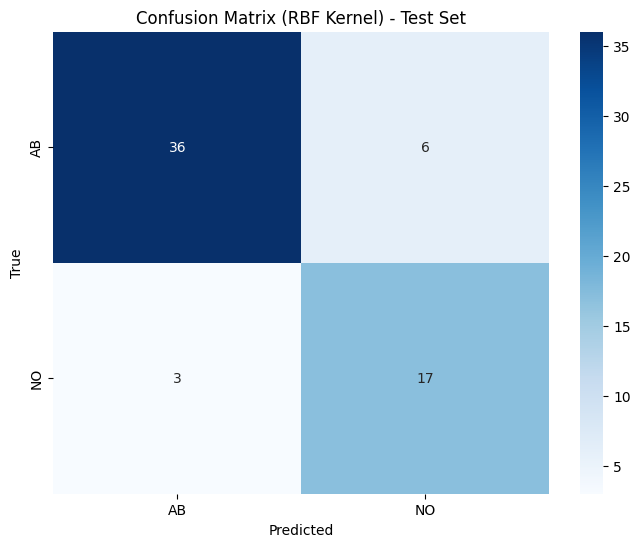

Classification Report (RBF Kernel) - Test Set:
              precision    recall  f1-score   support

          AB       0.92      0.86      0.89        42
          NO       0.74      0.85      0.79        20

    accuracy                           0.85        62
   macro avg       0.83      0.85      0.84        62
weighted avg       0.86      0.85      0.86        62



In [24]:
# Calculate testing accuracy for the SVM model with RBF kernel
accuracy_test_rbf = accuracy_score(y_test, y_test_pred_rbf)
print("Testing Accuracy (RBF Kernel):", accuracy_test_rbf)

# Generate confusion matrix for the SVM model with RBF kernel on the test set
conf_matrix_test_rbf = confusion_matrix(y_test, y_test_pred_rbf)
print("Confusion Matrix (RBF Kernel) - Test Set:")
print(conf_matrix_test_rbf)

# Plot confusion matrix for the SVM model with RBF kernel on the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_rbf, annot=True, cmap='Blues', fmt='d', xticklabels=svc_rbf.classes_, yticklabels=svc_rbf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (RBF Kernel) - Test Set')
plt.show()

# Generate classification report for the SVM model with RBF kernel on the test set
print("Classification Report (RBF Kernel) - Test Set:")
print(classification_report(y_test, y_test_pred_rbf))


## SVC Hyper-parameter tuning using GridSearchCV

1. We define a parameter grid containing different values of 'C' and 'gamma' to search over.
2. We create a GridSearchCV object, specifying the SVM model with RBF kernel (svc_rbf), the parameter grid, and the number of folds for cross-validation (cv=10).
3. We fit the GridSearchCV object to the training data, which will search for the best combination of parameters using cross-validation.
4. We extract the best parameters and the best model from the GridSearchCV results.
5. We use the best model to make predictions on the test set and calculate the accuracy of the best model on the test set.

In [18]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale',0.001, 0.01, 0.1, 1] # Kernel coefficient for 'rbf'
}

In [27]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svc_rbf, param_grid=param_grid, cv=10)

In [28]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 0.001, 0.01, 0.1, 1]})

In [29]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'gamma': 0.01}


In [30]:
# Get the best model
best_model = grid_search.best_estimator_
best_model

SVC(C=100, gamma=0.01)

In [31]:
# Predict on the test set using the best model
  = best_model.predict(X_test)

Test Accuracy (Best Model): 0.9032258064516129
Confusion Matrix (Best Model) - Test Set:
[[39  3]
 [ 3 17]]


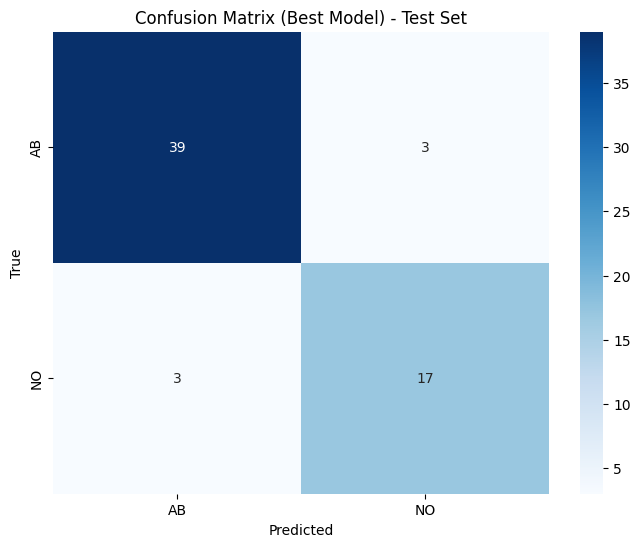

Classification Report (Best Model) - Test Set:
              precision    recall  f1-score   support

          AB       0.93      0.93      0.93        42
          NO       0.85      0.85      0.85        20

    accuracy                           0.90        62
   macro avg       0.89      0.89      0.89        62
weighted avg       0.90      0.90      0.90        62



In [32]:
# Calculate accuracy on the test set using the best model
accuracy_test_best = accuracy_score(y_test, y_test_pred_best)
print("Test Accuracy (Best Model):", accuracy_test_best)

# Generate confusion matrix for the best model on the test set
conf_matrix_test_best = confusion_matrix(y_test, y_test_pred_best)
print("Confusion Matrix (Best Model) - Test Set:")
print(conf_matrix_test_best)

# Plot confusion matrix for the best model on the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_best, annot=True, cmap='Blues', fmt='d', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Best Model) - Test Set')
plt.show()

# Generate classification report for the best model on the test set
print("Classification Report (Best Model) - Test Set:")
print(classification_report(y_test, y_test_pred_best))

## Visualizing Decision Boundary 

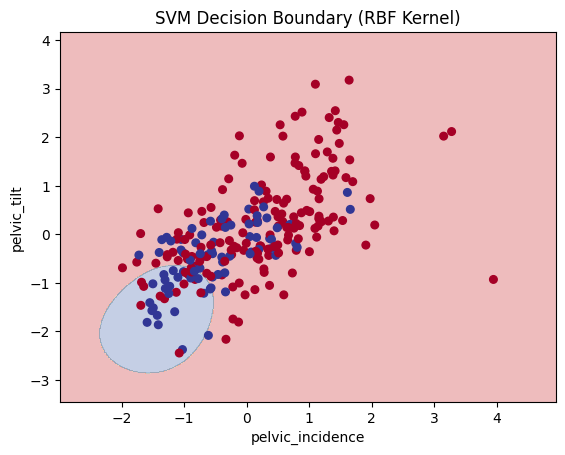

In [33]:
# Convert class labels to numerical values
y_train_numeric = y_train.map({'AB': 0, 'NO': 1})

# Fit SVC model on only two columns of the training data
svc_rbf.fit(X_train[:, :2], y_train_numeric)

# Create a meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on meshgrid points
mesh_predictions = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.RdYlBu, alpha=0.3)

# Scatter plot for the original data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_numeric, cmap=plt.cm.RdYlBu, marker='o', s=30)

plt.title('SVM Decision Boundary (RBF Kernel)')
plt.xlabel('pelvic_incidence')
plt.ylabel('pelvic_tilt')
plt.show()


In [90]:
# Loop through feature combinations
for i, (feature1_idx, feature2_idx) in enumerate(feature_combinations):
    # Fit SVC model on two columns of the training data
    svc_rbf.fit(X_train.iloc[:, [feature1_idx, feature2_idx]], y_train_numeric)
    
    # Create a meshgrid
    x_min, x_max = X_train.iloc[:, feature1_idx].min() - 1, X_train.iloc[:, feature1_idx].max() + 1
    y_min, y_max = X_train.iloc[:, feature2_idx].min() - 1, X_train.iloc[:, feature2_idx].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on meshgrid points
    mesh_predictions = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx.shape)

    # Plot the decision boundary
    axes[i].contourf(xx, yy, mesh_predictions, cmap=plt.cm.RdYlBu, alpha=0.3)

    # Scatter plot for the original data points
    axes[i].scatter(X_train.iloc[:, feature1_idx], X_train.iloc[:, feature2_idx], c=y_train_numeric, cmap=plt.cm.RdYlBu, marker='o', s=30)

    axes[i].set_title('Decision Boundary')
    axes[i].set_ylabel(f'{X_train.columns[feature2_idx]}')

# Remove empty subplots
for j in range(len(feature_combinations), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


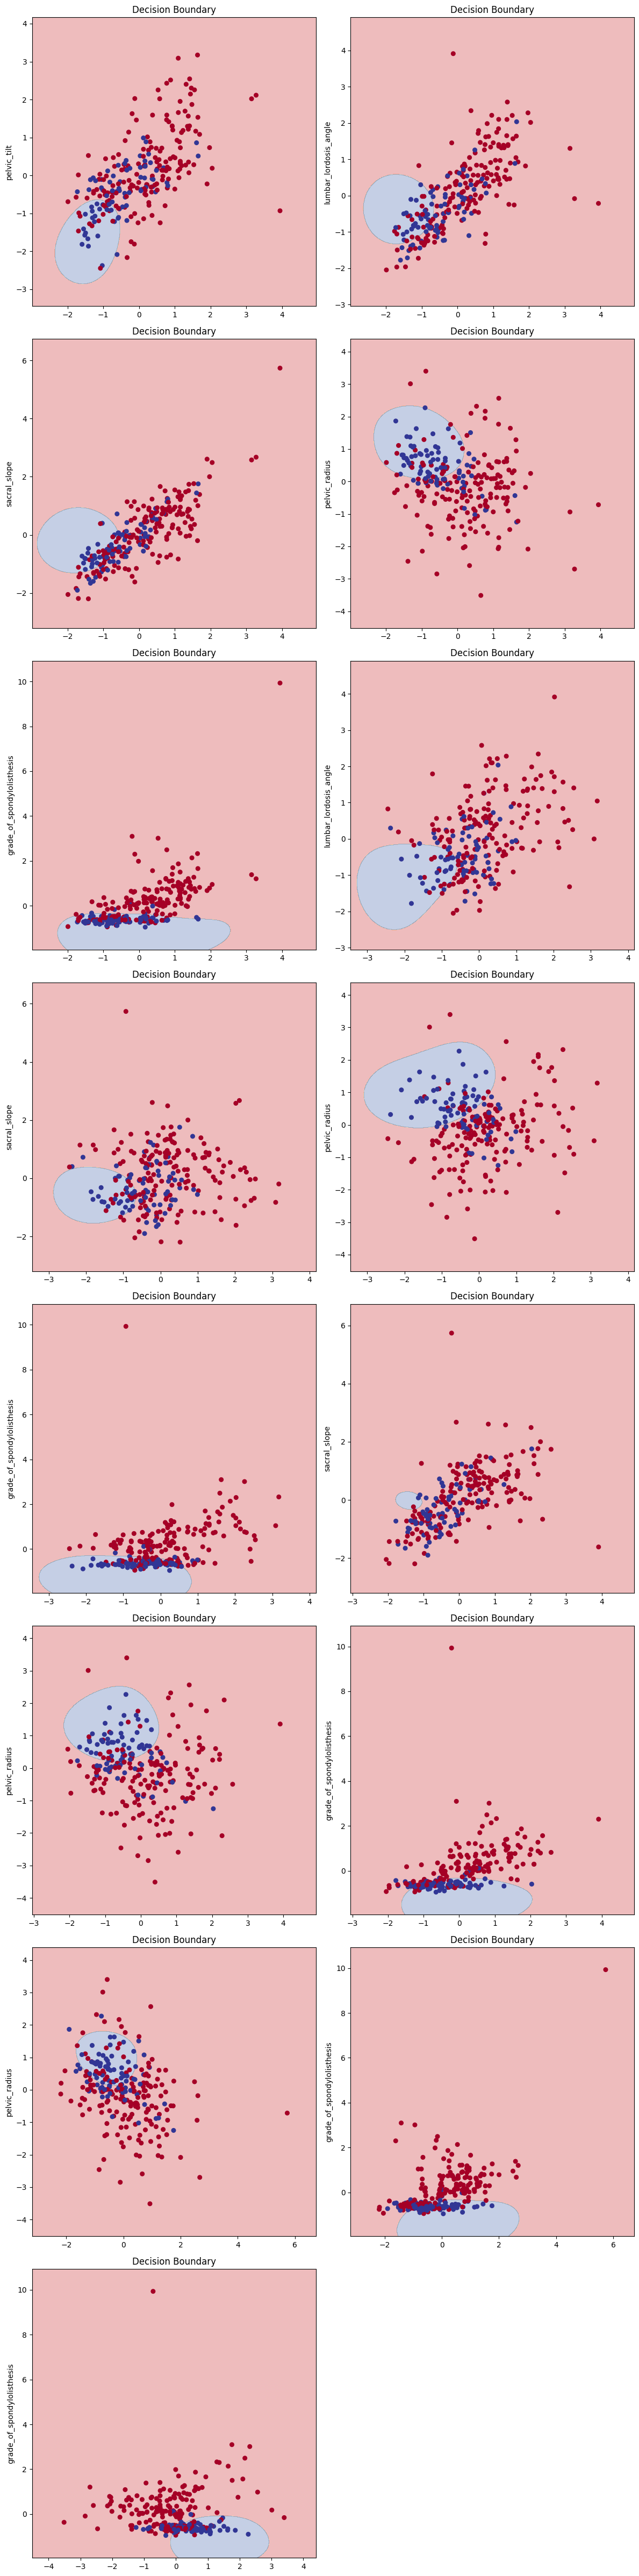

In [40]:
from itertools import combinations

# Convert class labels to numerical values
y_train_numeric = y_train.map({'AB': 0, 'NO': 1})

# Create a list of all combinations of two features
feature_combinations = list(combinations(range(X_train.shape[1]), 2))

# Calculate the number of rows and columns for subplots
n_rows = (len(feature_combinations) + 1) // 2  # Add 1 to handle odd number of combinations
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through feature combinations
for i, (feature1_idx, feature2_idx) in enumerate(feature_combinations):
    # Fit SVC model on two columns of the training data
    svc_rbf.fit(X_train[:, [feature1_idx, feature2_idx]], y_train_numeric)
    
    # Create a meshgrid
    x_min, x_max = X_train[:, feature1_idx].min() - 1, X_train[:, feature1_idx].max() + 1
    y_min, y_max = X_train[:, feature2_idx].min() - 1, X_train[:, feature2_idx].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on meshgrid points
    mesh_predictions = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx.shape)

    # Plot the decision boundary
    axes[i].contourf(xx, yy, mesh_predictions, cmap=plt.cm.RdYlBu, alpha=0.3)

    # Scatter plot for the original data points
    axes[i].scatter(X_train[:, feature1_idx], X_train[:, feature2_idx], c=y_train_numeric, cmap=plt.cm.RdYlBu, marker='o', s=30)

    axes[i].set_title('Decision Boundary')
    axes[i].set_ylabel(f'{X.columns[feature2_idx]}')

# Remove empty subplots
for j in range(len(feature_combinations), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Unsupervised Learning 

In [49]:
unsup_data = pd.read_csv('vertebral_column_data.txt',delimiter=' ',header=None, names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "class"]).drop('class',axis=1)
unsup_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92
...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25
306,53.94,20.72,29.22,33.22,114.37,-0.42
307,61.45,22.69,46.17,38.75,125.67,-2.71
308,45.25,8.69,41.58,36.56,118.55,0.21


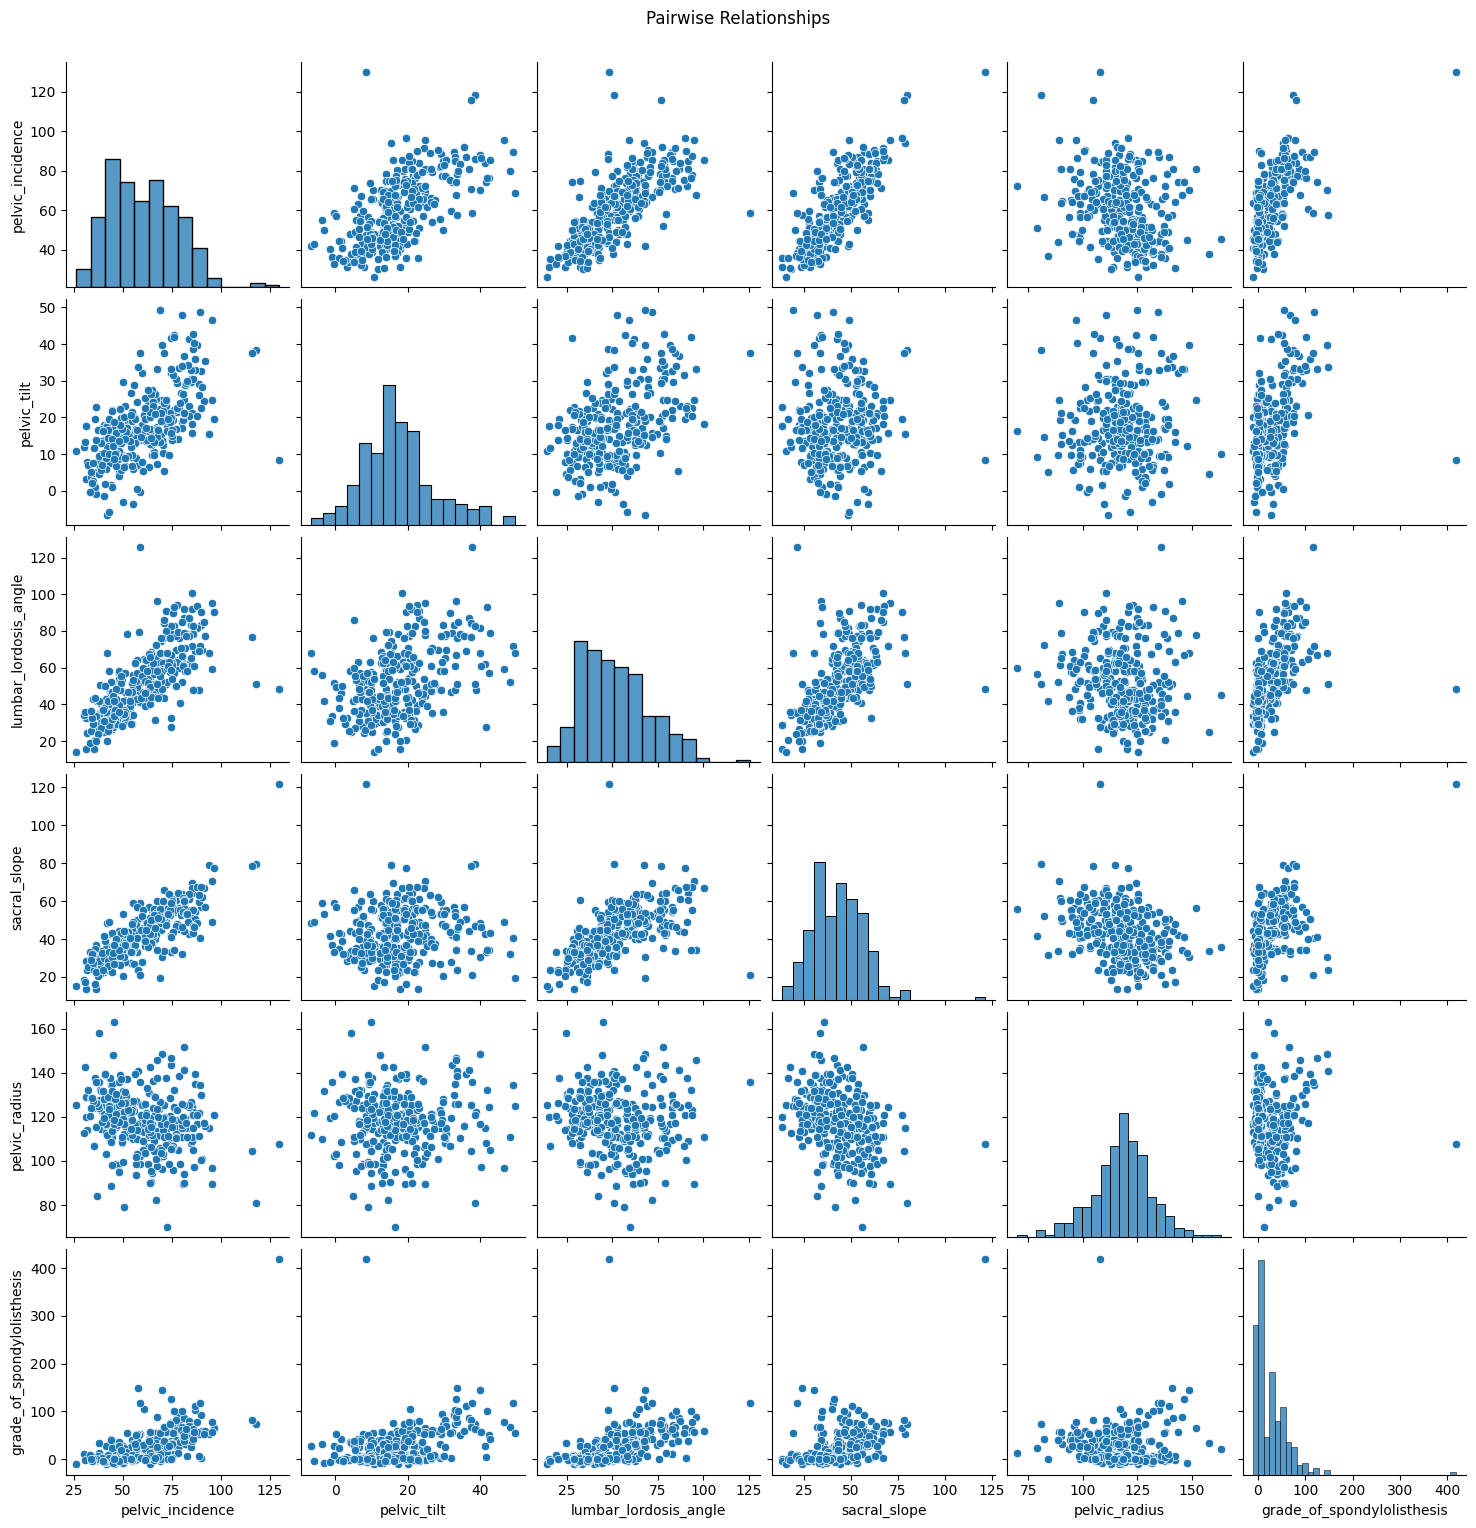

In [50]:
# Pairplot to visualize pairwise relationships
sns.pairplot(unsup_data)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

### Feature Scaling

In [51]:
# Take off the mean, but don't scale to get unit variance
Scaler = StandardScaler()
values = Scaler.fit_transform(unsup_data)

# Check that the standardisation has happened down columns:
# we should get numbers very near zero here.
print( values.mean( axis=0 )[0:10] )

[ 7.56384203e-16  3.43811001e-16 -1.37524400e-16  9.16829336e-17
  1.20333850e-15 -4.58414668e-17]


### PCA : Dimensionality Reduction

In [52]:
from sklearn.decomposition import PCA

# Do PCA
PCAthreshold = 0.90
pca = PCA(n_components = PCAthreshold, svd_solver="full")
reduced_unsup_data = pca.fit_transform(values)
reduced_unsup_data.shape

(310, 4)

Cumulative Explained Variance: This section explains how much of the variance

in the data is explained by each additional principal component. It shows that a certain number of components are sufficient to capture a high percentage of the variance in the data.

Explained Variance Ratio Plot: This plot visually displays the contribution of each principal component to the total variance. The horizontal line at 90% variance indicates the threshold for selecting the number of components. The vertical line marks the number of components required to reach 90% variance.

Bar Plot for Explained Variance Ratio: This plot provides a clear overview of the explained variance ratio for each principal component. The annotations on each bar show the exact percentage of variance explained by each component.

PCA Interpretation using Eigensystem: In this section, you can explain the meaning of each principal component in terms of the original features. This involves examining the loadings or eigenvectors associated with each component. The loadings indicate the strength and direction of the relationship between the original features and the principal component. You can interpret the loadings to understand which features contribute most to each principal component and how they are related.

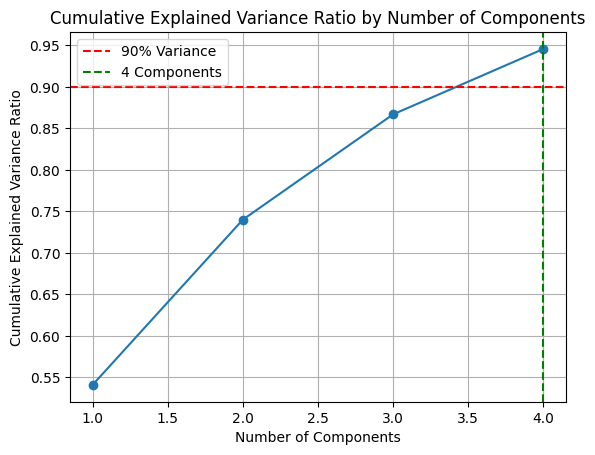

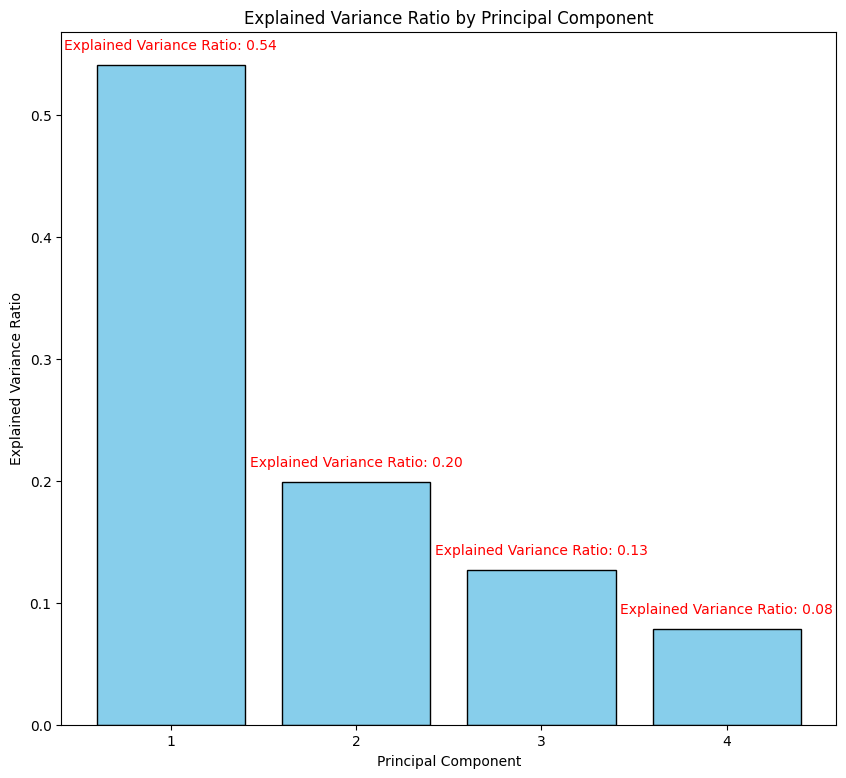

In [53]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Plot explained variance ratio
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Variance')
plt.axvline(x=n_components_90, color='green', linestyle='--', label=f'{n_components_90} Components')
plt.legend()
plt.grid(True)
plt.show()

# Create a bar plot for explained variance ratio
plt.figure(figsize=(10, 9))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')

# Add PCA interpretation using eigensystem
for i in range(len(pca.explained_variance_ratio_)):
    plt.text(i + 1, pca.explained_variance_ratio_[i] + 0.01, f'Explained Variance Ratio: {pca.explained_variance_ratio_[i]:.2f}',
             ha='center', va='bottom', fontsize=10, color='red')

plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()


In [54]:
reduced_unsup_data[0:5, :]

array([[-0.23836132, -0.89346458, -1.54747828,  0.05457487],
       [-2.24645299, -0.40130963, -0.30289504,  0.64297846],
       [ 0.27829698, -0.65388174, -1.00857292, -0.51419182],
       [ 0.37428106, -0.65789894, -1.34440025,  0.04023099],
       [-1.37359652, -1.06165957, -0.26196477,  0.53057875]])

## K-Means Clustering

1. Model: K-means Clustering
2. Reasoning: K-means clustering is a simple and efficient algorithm for partitioning the dataset into clusters based on similarity. It can provide insights into the natural groupings present in the data.

Text(0.5, 1.0, 'Elbow Method for Optimal K')

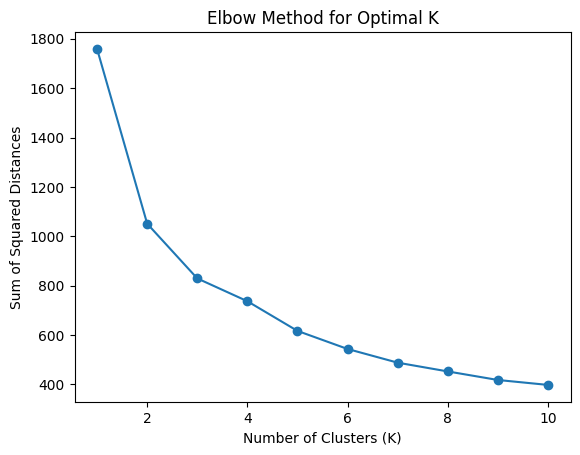

In [55]:
maxK = 10
sumOfSquares = np.empty(maxK)

for k in range(1, maxK + 1):
    Kmeans = KMeans(n_clusters=k, n_init=10)
    Kmeans.fit(reduced_unsup_data)
    sumOfSquares[k - 1] = Kmeans.inertia_

# Plot the Elbow Method
plt.plot(list(range(1, maxK + 1)), sumOfSquares, marker="o")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')

# # Draw a vertical line at the optimal K
# optimal_k = 2  # Replace 3 with the actual optimal K value
# plt.axvline(x=optimal_k, color='red', linestyle='--')

# plt.show()


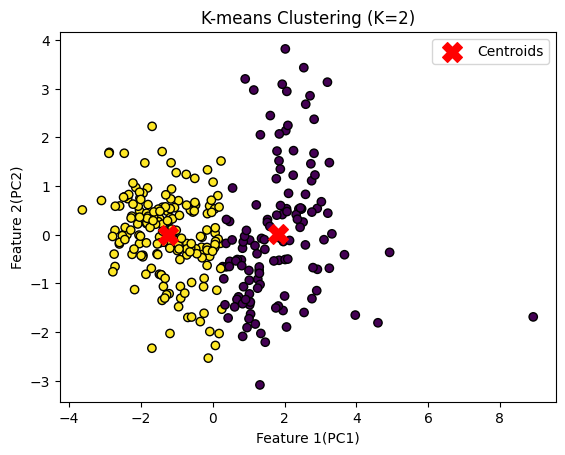

Cluster 0: 126 data points
Cluster 1: 184 data points


In [56]:

from sklearn.cluster import KMeans

# Assuming 'reduced_unsup_data' is your reduced unsupervised data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(reduced_unsup_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get the unique labels and their counts
unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

# Visualize the clusters
plt.scatter(reduced_unsup_data[:, 0], reduced_unsup_data[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add legends for both classes
plt.xlabel('Feature 1(PC1)')
plt.ylabel('Feature 2(PC2)')
plt.title('K-means Clustering (K=2)')
plt.legend()

plt.show()

# Print the counts of data points in each cluster separately
for label, count in zip(unique_labels, label_counts):
    print(f'Cluster {label}: {count} data points')


 To decide on the optimal number of clusters (K) using the elbow method, you need to look for the "elbow point" in the plot. This point indicates where the rate of decrease in the sum of squared distances starts to slow down, suggesting diminishing returns in terms of adding more clusters. Let's analyze the plot and determine the optimal K.



*   Once you have the plot, observe where there's a significant decrease in the slope of the curve. This is typically the elbow point. Beyond this point, adding more clusters doesn't significantly reduce the sum of squared distances.

In [57]:
reduced_unsup_data = pd.DataFrame(reduced_unsup_data, columns=['pc1','pc2','pc3','pc4'])

In [58]:
reduced_unsup_data_pca = pd.concat([unsup_data.reset_index(drop=True), reduced_unsup_data],axis=1)
reduced_unsup_data_pca['K-Means PCA'] = kmeans.labels_

## Comparing Unsupervised method with the Ground Truth

In [62]:
data['class']=data['class'].map({'AB':0,'NO':1})

In [63]:
target = data['class']
target

0      0
1      0
2      0
3      0
4      0
      ..
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int64

In [67]:
accuracy_kmeans = accuracy_score(target, kmeans.labels_)
print('Kmeans Accuracy( compared with Ground Truth): ', accuracy_kmeans)

Kmeans Accuracy( compared with Ground Truth):  0.6645161290322581
